1. Load the data from a specific sheet
2. Extract the migration flows for California	Florida	Georgia	Ilinois	Indiana 	Michigan	New Jersey	New York Texas
3. Construct a matrix for each year

In [1]:
import pandas as pd 

data_2005_new = pd.read_excel("Mappe5.2.xlsx", sheet_name='2005', header=0)
data_2005_new.head()


,Unnamed: 0,Alabama,Unnamed: 2,Alaska,Unnamed: 4,Arizona,Unnamed: 6,Arkansas,Unnamed: 8,California,...,Virginia,Unnamed: 96,Washington,Unnamed: 98,West Virginia,Unnamed: 100,Wisconsin,Unnamed: 102,Wyoming,Unnamed: 104
0,NaN,Estimate,MOE,Estimate,MOE,Estimate,MOE,Estimate,MOE,Estimate,...,Estimate,MOE,Estimate,MOE,Estimate,MOE,Estimate,MOE,Estimate,MOE
1,Alabama,580353,22382,608,432,574,542,3168,1655,3025,...,2572,1142,1324,817,432,467,303,230,436,507
2,Alaska,152,176,84150,6528,883,530,54,83,3898,...,618,537,5711,2516,0,233,765,465,222,353
3,Arizona,1427,784,1836,1443,917186,26917,1845,948,94296,...,4196,2459,10335,2314,527,468,7798,2272,1458,811
4,Arkansas,1894,1228,660,504,1266,617,390364,17198,6167,...,1355,997,1062,1260,59,77,1542,1232,41,71


In [2]:
# Extracting relevant states
states = ["California", "Florida", "Illinois", "Indiana", "Michigan", "New Jersey", "New York", "Texas"]

# Displaying a portion of the 2005 data to manually inspect and ensure correct referencing
data_2005_new.loc[data_2005_new.iloc[:, 0].isin(states), ["Unnamed: 0"] + states]



,Unnamed: 0,California,Florida,Illinois,Indiana,Michigan,New Jersey,New York,Texas
5,California,4904586,25252,15848,5611,10073,11816,26079,36030
11,Florida,29152,2415250,18400,17746,24999,34417,98535,25297
16,Illinois,18821,15093,1519844,18035,10826,1566,5490,11364
17,Indiana,7181,9076,26428,793221,10929,1449,1579,6457
27,Michigan,7631,12757,9035,9045,1217671,743,4092,6312
37,New Jersey,7809,14423,2890,558,2743,750278,62314,4415
39,New York,18568,25513,7915,2205,5680,24790,1754183,6372
53,Texas,74777,31340,15793,5539,17181,6490,13267,3488485


In [3]:
# Extracting the migration matrix for the year 2005 using the relevant rows and columns
migration_matrix_2005 = data_2005_new.set_index("Unnamed: 0").loc[states, states]

# Cleaning NaN and non-numeric entries
migration_matrix_2005 = migration_matrix_2005.fillna(0)

migration_matrix_2005


,California,Florida,Illinois,Indiana,Michigan,New Jersey,New York,Texas
Unnamed: 0,,,,,,,,
California,4904586,25252,15848,5611,10073,11816,26079,36030
Florida,29152,2415250,18400,17746,24999,34417,98535,25297
Illinois,18821,15093,1519844,18035,10826,1566,5490,11364
Indiana,7181,9076,26428,793221,10929,1449,1579,6457
Michigan,7631,12757,9035,9045,1217671,743,4092,6312
New Jersey,7809,14423,2890,558,2743,750278,62314,4415
New York,18568,25513,7915,2205,5680,24790,1754183,6372
Texas,74777,31340,15793,5539,17181,6490,13267,3488485


Repeat the process for all of the years

In [4]:
# Load all sheets from the Excel file
all_sheets_new = pd.read_excel("Mappe5.2.xlsx", sheet_name=None)

# Initialize dictionary to store migration matrices for each year
migration_matrices = {}

# Construct migration matrices for each year
for year, data in all_sheets_new.items():
    if year not in ['2005', 'Sheet1']:  # 2005 is already processed and Sheet1 is not a year
        migration_matrix = data.set_index("Unnamed: 0").loc[states, states]
        migration_matrix = migration_matrix.fillna(0)
        migration_matrices[year] = migration_matrix

# Adding the 2005 matrix to the dictionary
migration_matrices['2005'] = migration_matrix_2005

migration_matrices


{'2006':             California  Florida  Illinois  Indiana  Michigan  New Jersey  \
 Unnamed: 0                                                                 
 California     5173950    27196     25149     6972     10693        8843   
 Florida          27658  2485338     26188    13454     30983       36055   
 Illinois         15322    17271   1662179    20749     14740        3058   
 Indiana           7374    10469     34027   884452     14603         921   
 Michigan          9623    13738     12623     7867   1272755        2006   
 New Jersey        7910     9728      2640      790       633      798283   
 New York         23126    30809      7110     1618      3209       37102   
 Texas            81572    39872     24132    12553      9942       12099   
 
             New York    Texas  
 Unnamed: 0                     
 California     31703    49027  
 Florida        87576    30708  
 Illinois        7523    14431  
 Indiana         3166    10493  
 Michigan        4739 

**Creating a weighted network per year**

Nodes = Each state 
Edges = migration flow 



In [5]:
import networkx as nx

# Dictionary to store networks for each year
networks = {}

# Re-add the 2005 matrix to the dictionary
migration_matrices['2005'] = migration_matrix_2005

# Re-construct networks for each year
for year, matrix in migration_matrices.items():
    # Create a directed graph for each year
    G = nx.DiGraph()
    
    # Add nodes
    for state in states:
        G.add_node(state)
    
    # Add weighted edges based on migration flows
    for source, row in matrix.iterrows():
        for target, migrants in row.items():
            if source != target and migrants > 0:  # Avoid self-loops and edges with zero migrants
                G.add_edge(source, target, weight=migrants)
    
    # Store the graph in the networks dictionary
    networks[year] = G

# Display basic statistics of the 2005 network as an example
nx.info(networks['2005'])


/var/folders/5m/n7bh0y3n41b6k1g2czh732v00000gn/T/ipykernel_97361/1212239014.py:28: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  nx.info(networks['2005'])


'DiGraph with 8 nodes and 56 edges'

**Visualize the weighted network**

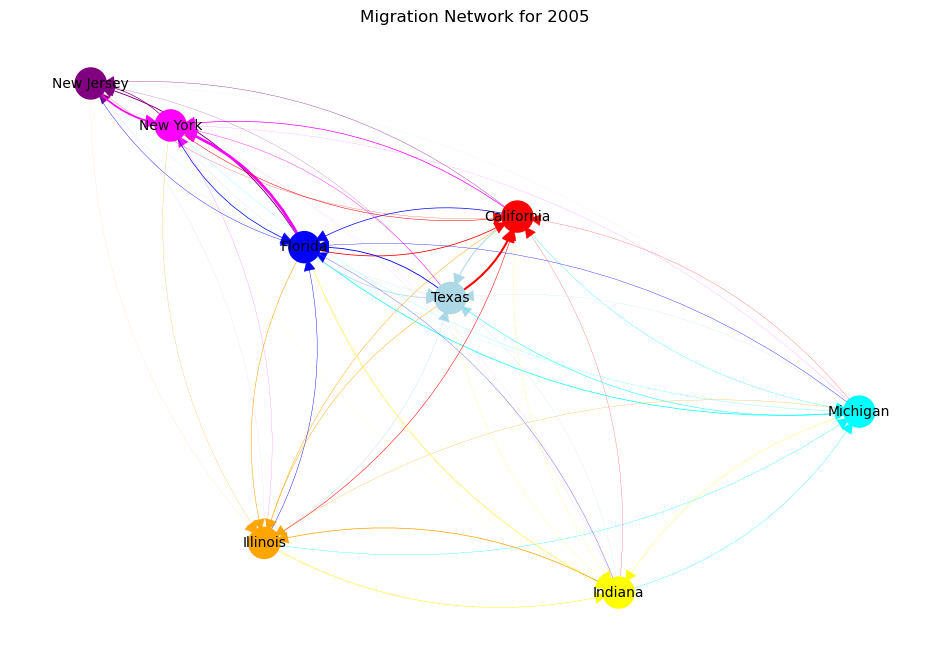

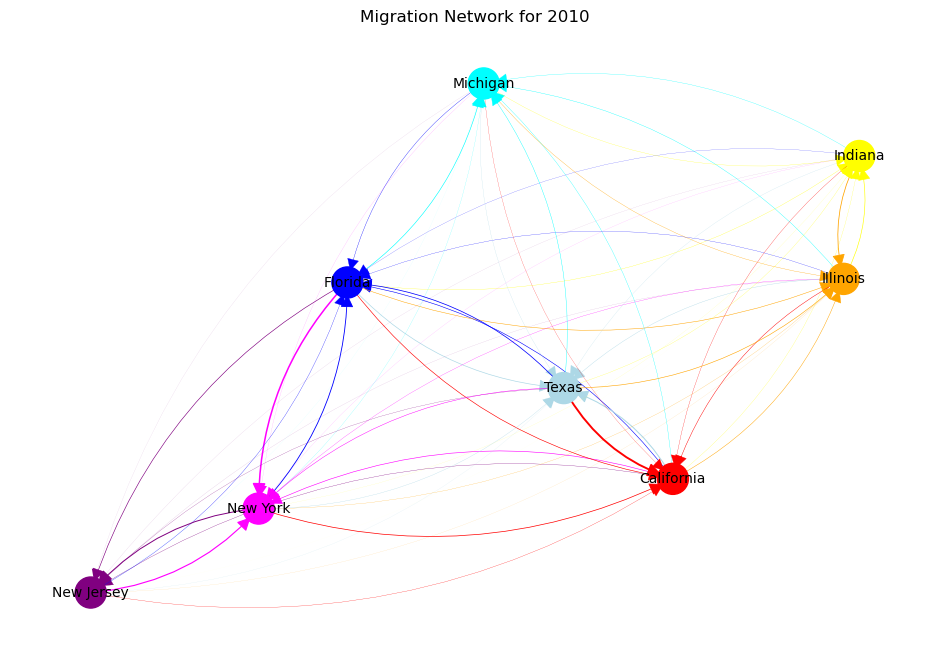

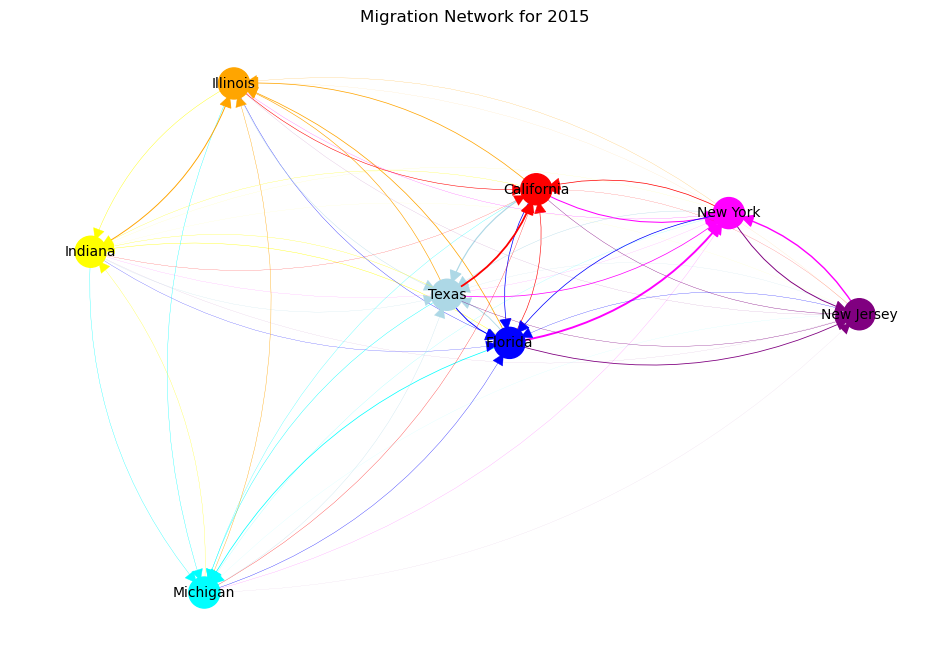

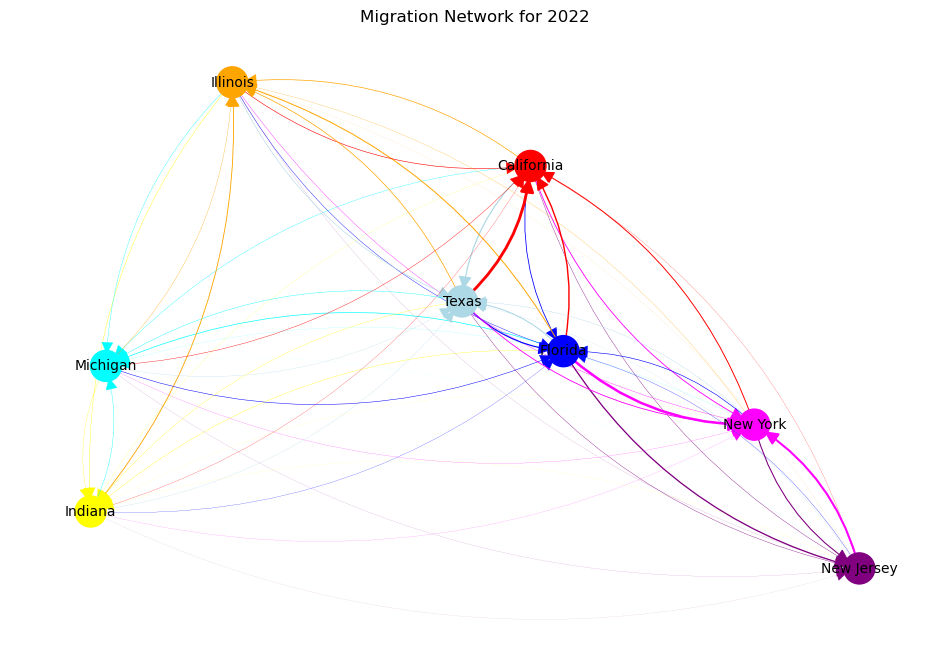

In [6]:
import matplotlib.pyplot as plt
import networkx as nx

# Function to visualize a network for a given year with varying edge thickness
def visualize_network(year, graph):
    plt.figure(figsize=(12, 8))
    
    # Position nodes using a spring layout
    pos = nx.spring_layout(graph, seed=42)
    
    node_colors = {
        'California': 'red',
        'Florida': 'blue',
        'Georgia': 'green',
        'Illinois': 'orange',
        'Indiana': 'yellow',
        'Michigan': 'cyan',
        'New Jersey': 'purple',
        'New York': 'magenta',
        'Texas': 'lightblue'
    }
    
    # Create a dictionary to map nodes to colors
    node_color_dict = {node: node_colors[node] for node in graph.nodes()}
    
    # Draw nodes with different colors
    node_color_list = [node_color_dict[node] for node in graph.nodes()]
    nx.draw_networkx_nodes(graph, pos, node_color=node_color_list, node_size=500)
    
    # Draw edges as lines with arrows at the end, and adjust thickness based on weight
    for u, v in graph.edges():
        edge_weight = graph[u][v]['weight']
        pos_u = pos[u]
        pos_v = pos[v]
        
        edge_color = node_color_dict[v]  # Edge color based on the target node's color
        
        # Calculate edge width based on the weight
        edge_width = edge_weight / 50000
        
        # Draw edges as lines with arrows at the end and specified color and thickness
        nx.draw_networkx_edges(graph, pos, edgelist=[(u, v)], width=edge_width, edge_color=edge_color, connectionstyle="arc3,rad=0.2", arrowsize=20)
    
    # Draw node labels
    nx.draw_networkx_labels(graph, pos, font_size=10)
    
    plt.title(f"Migration Network for {year}")
    plt.axis("off")
    plt.show()
    
# Visualize networks for a few years as an example
sample_years = ['2005', '2010', '2015', '2022']
for year in sample_years:
    visualize_network(year, networks[year])

In order to increase the differences between the weight I raise each weight to the power of 2.

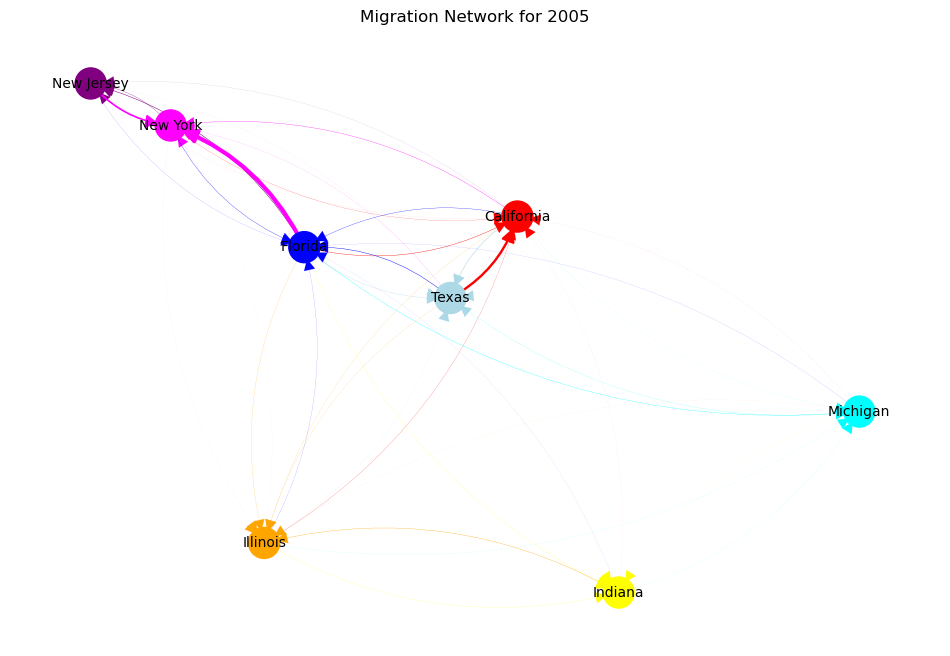

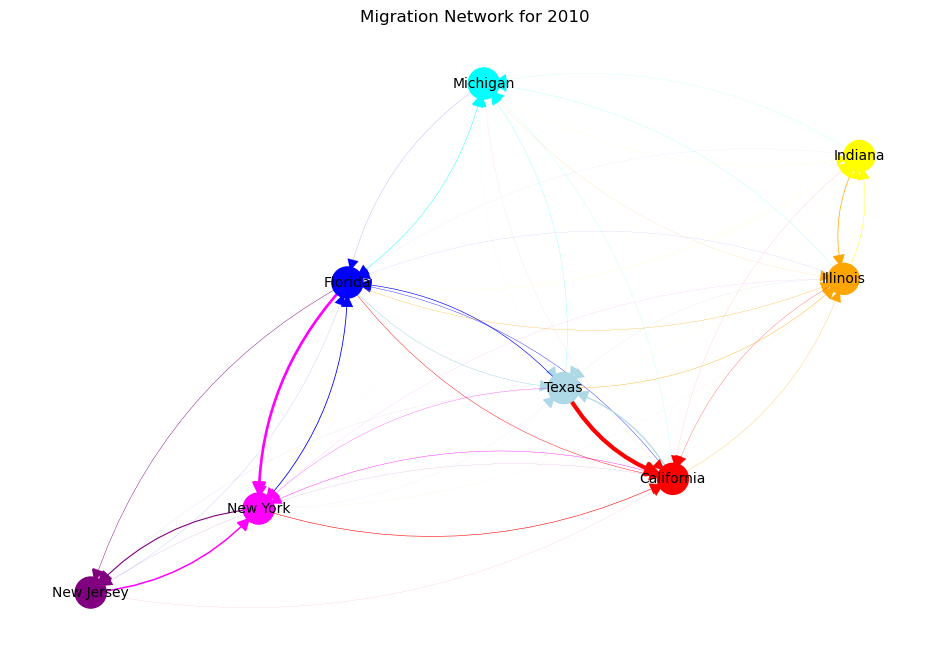

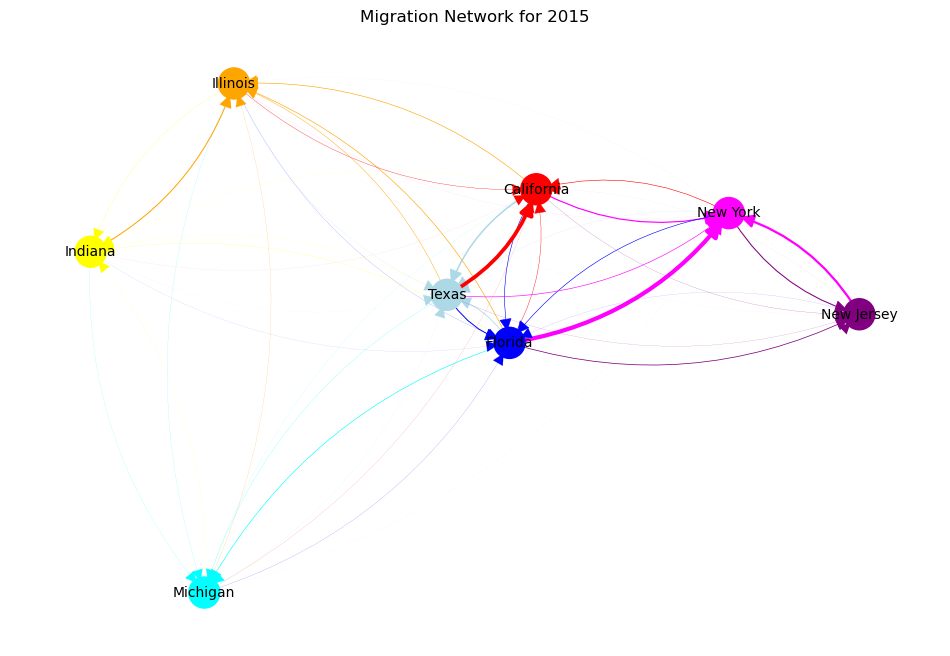

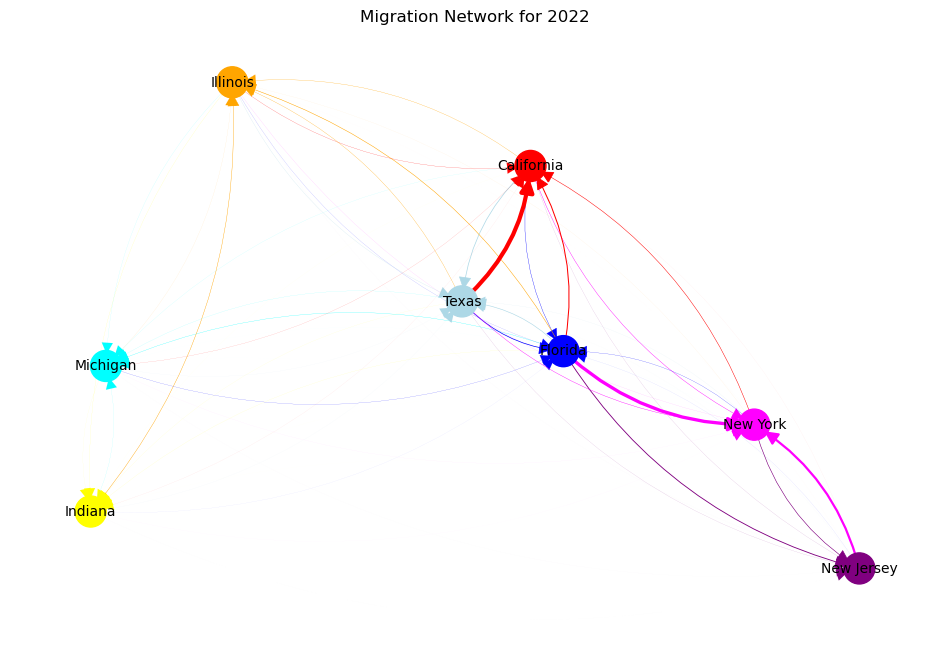

In [7]:
import matplotlib.pyplot as plt
import networkx as nx

# Function to visualize a network for a given year with enhanced edge weight differences
def visualize_network(year, graph):
    plt.figure(figsize=(12, 8))
    
    # Position nodes using a spring layout
    pos = nx.spring_layout(graph, seed=42)
    
    node_colors = {
        'California': 'red',
        'Florida': 'blue',
        'Georgia': 'green',
        'Illinois': 'orange',
        'Indiana': 'yellow',
        'Michigan': 'cyan',
        'New Jersey': 'purple',
        'New York': 'magenta',
        'Texas': 'lightblue'
    }
    
    # Create a dictionary to map nodes to colors
    node_color_dict = {node: node_colors[node] for node in graph.nodes()}
    
    # Draw nodes with different colors
    node_color_list = [node_color_dict[node] for node in graph.nodes()]
    nx.draw_networkx_nodes(graph, pos, node_color=node_color_list, node_size=500)
    
    # Apply a power transformation to edge weights for enhanced differences
    power = 2  # Adjust this value to control the degree of enhancement
    edge_weights = [graph[u][v]['weight']**power for u, v in graph.edges()]
    
    # Normalize edge weights for visualization
    max_weight = max(edge_weights)
    normalized_weights = [weight / max_weight for weight in edge_weights]
    
    # Draw edges as lines with arrows at the end, and adjust thickness based on the transformed weights
    for (u, v), weight in zip(graph.edges(), normalized_weights):
        pos_u = pos[u]
        pos_v = pos[v]
        
        edge_color = node_color_dict[v]  # Edge color based on the target node's color
        
        # Draw edges as lines with arrows at the end and specified color and thickness
        nx.draw_networkx_edges(graph, pos, edgelist=[(u, v)], width=weight * 3, edge_color=edge_color, connectionstyle="arc3,rad=0.2", arrowsize=20)
    
    # Draw node labels
    nx.draw_networkx_labels(graph, pos, font_size=10)
    
    plt.title(f"Migration Network for {year}")
    plt.axis("off")
    plt.show()
    
# Visualize networks for a few years as an example
sample_years = ['2005', '2010', '2015', '2022']
for year in sample_years:
    visualize_network(year, networks[year])

Display the network on the map of the US. 

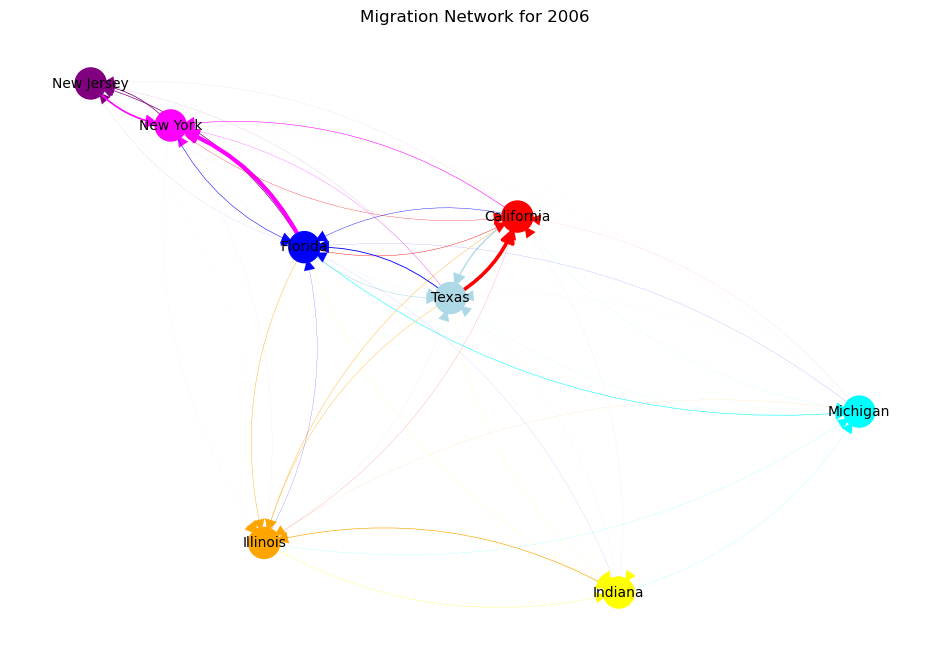

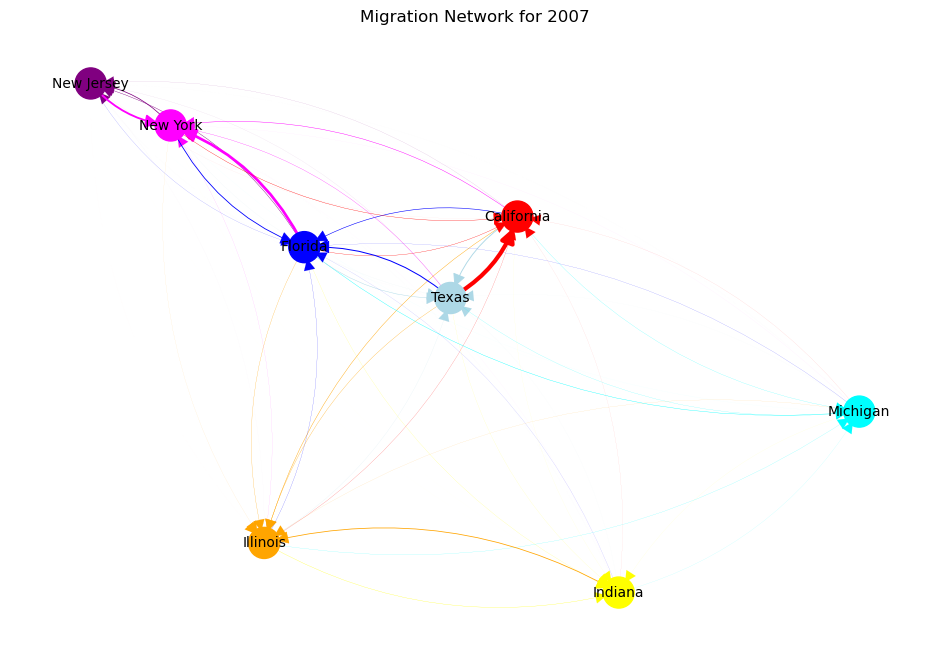

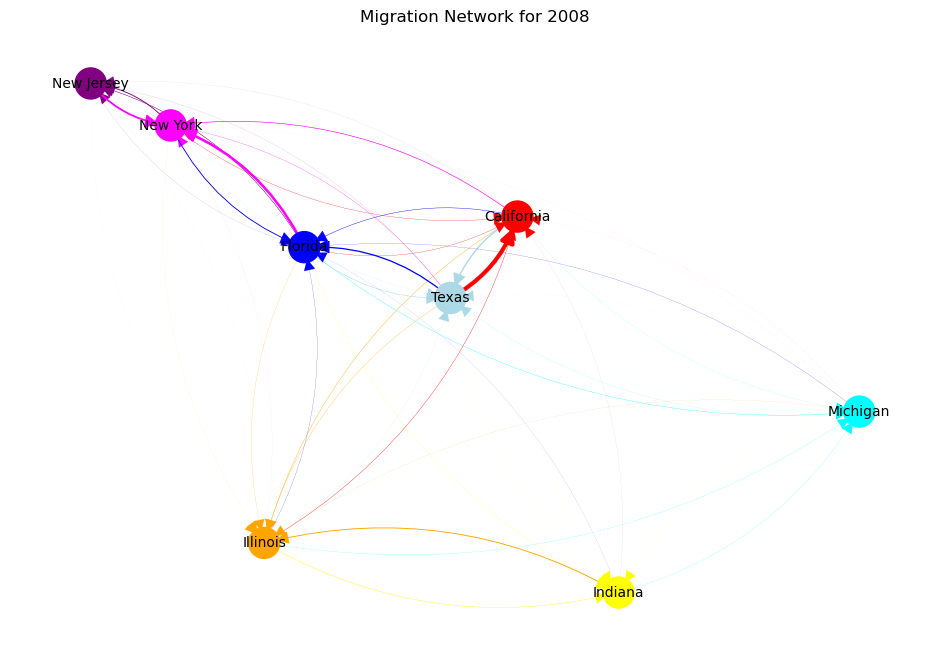

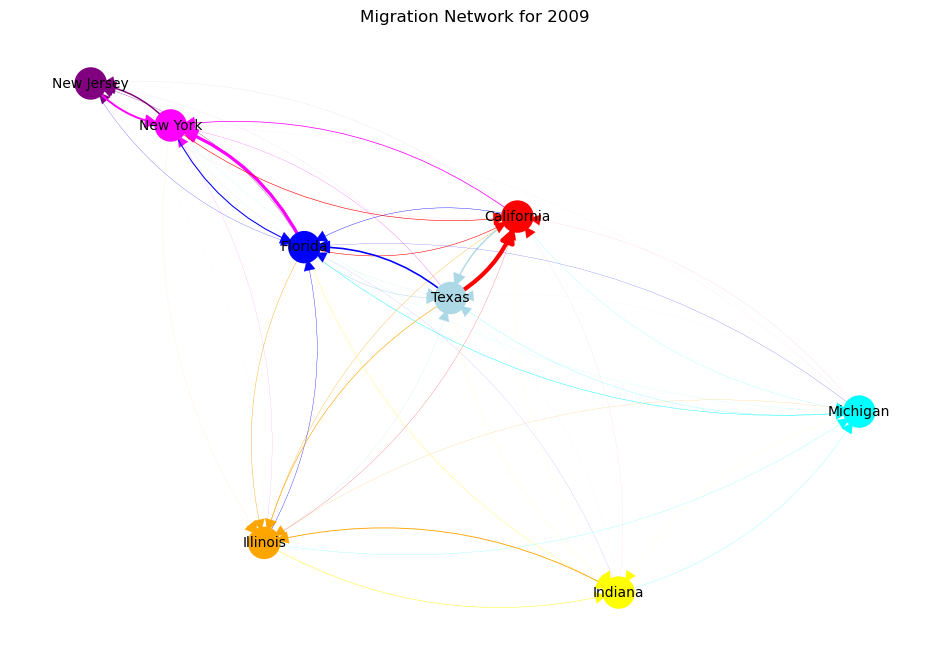

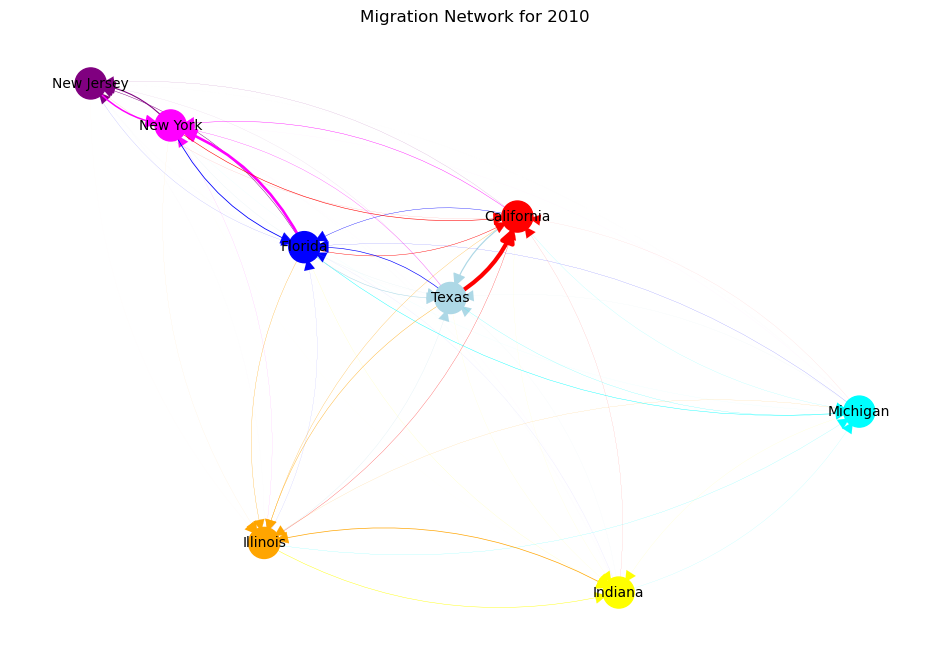

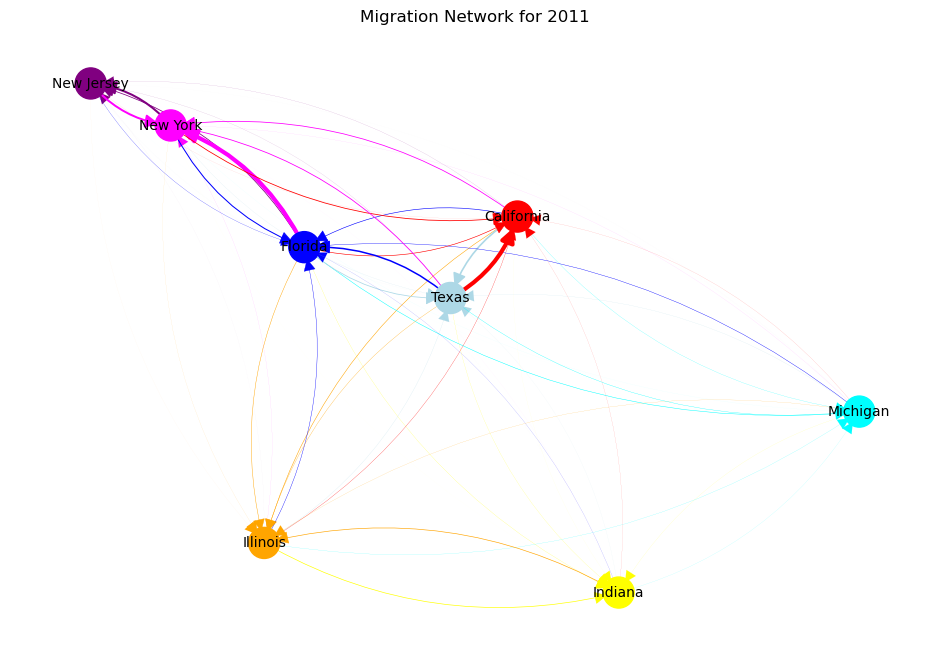

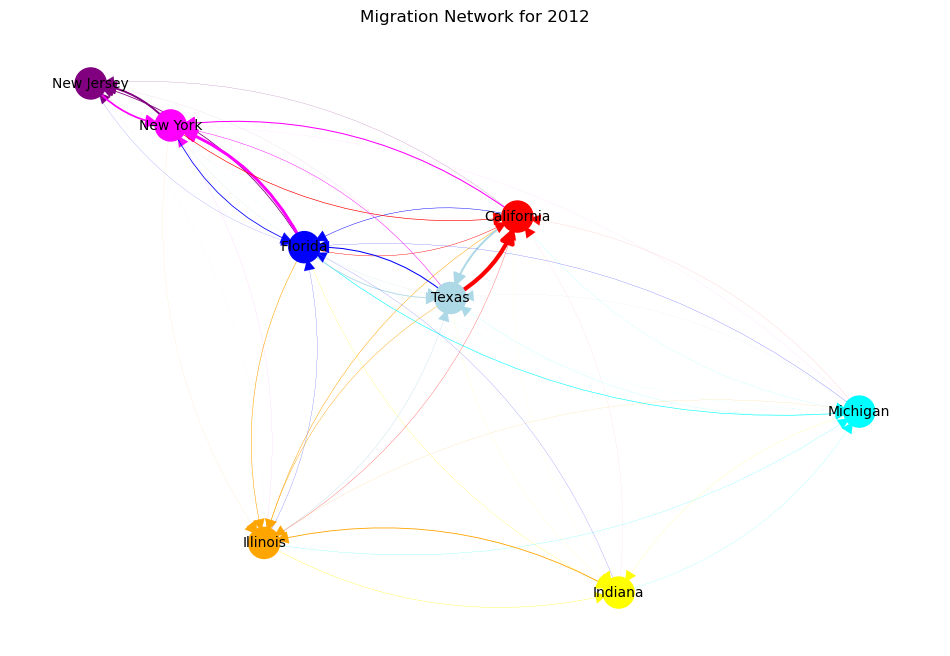

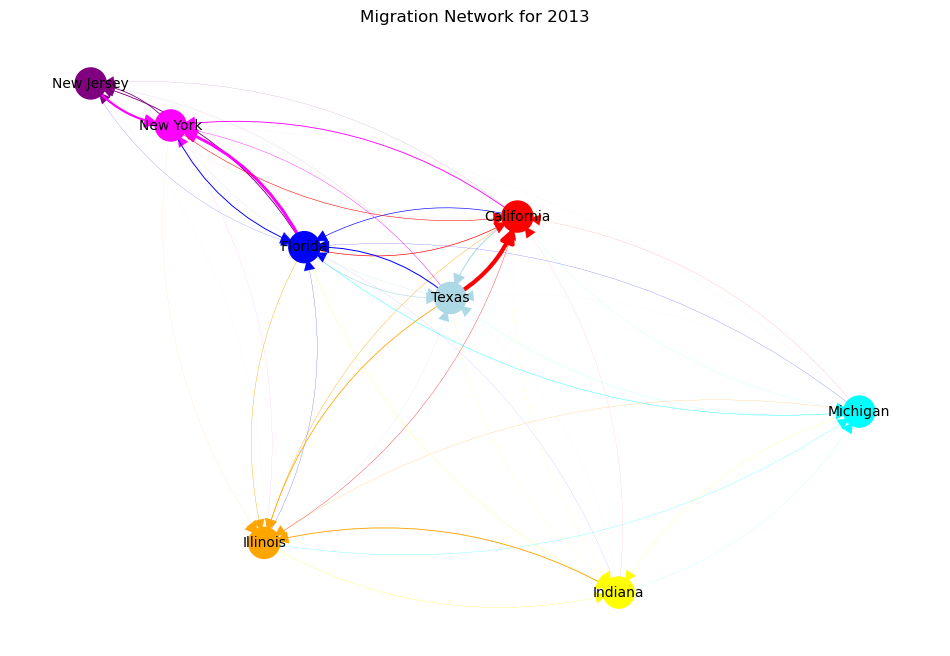

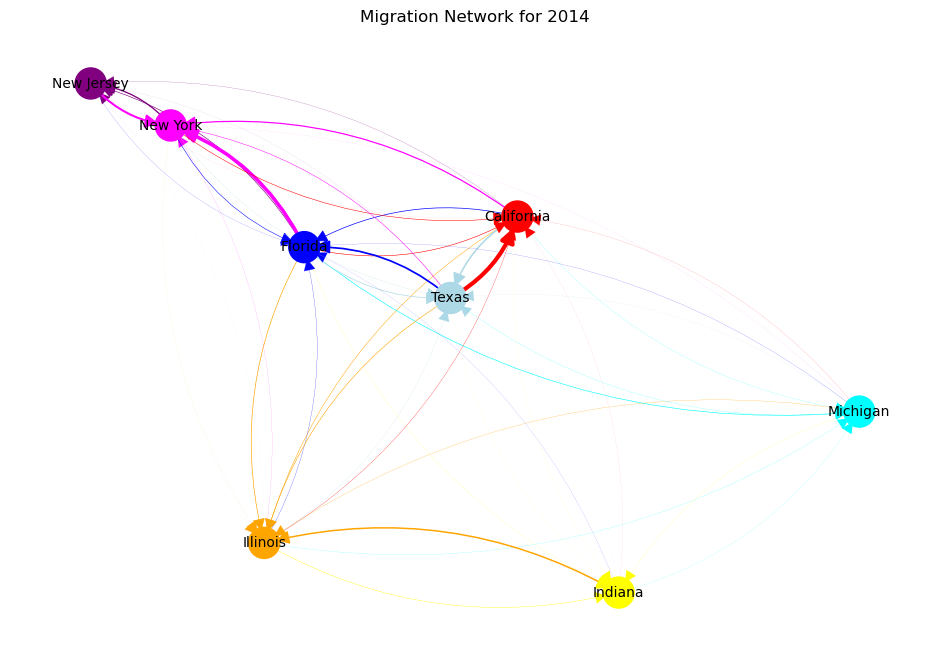

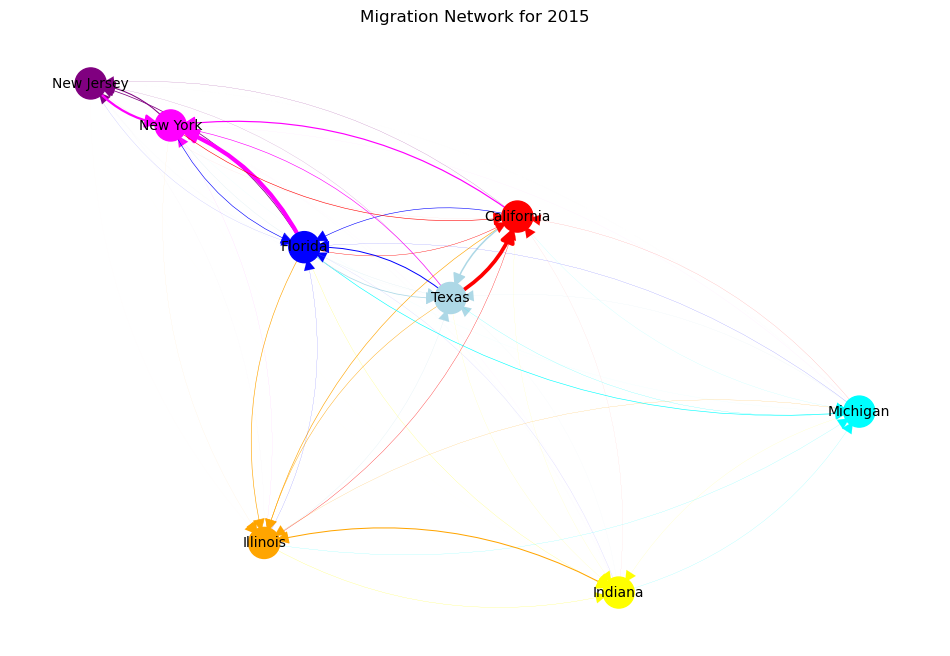

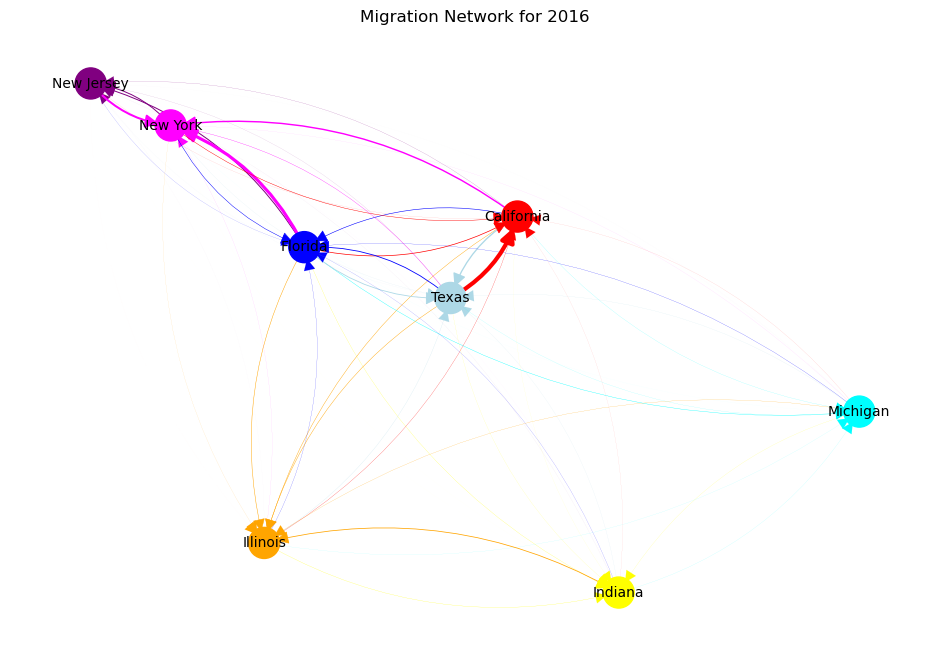

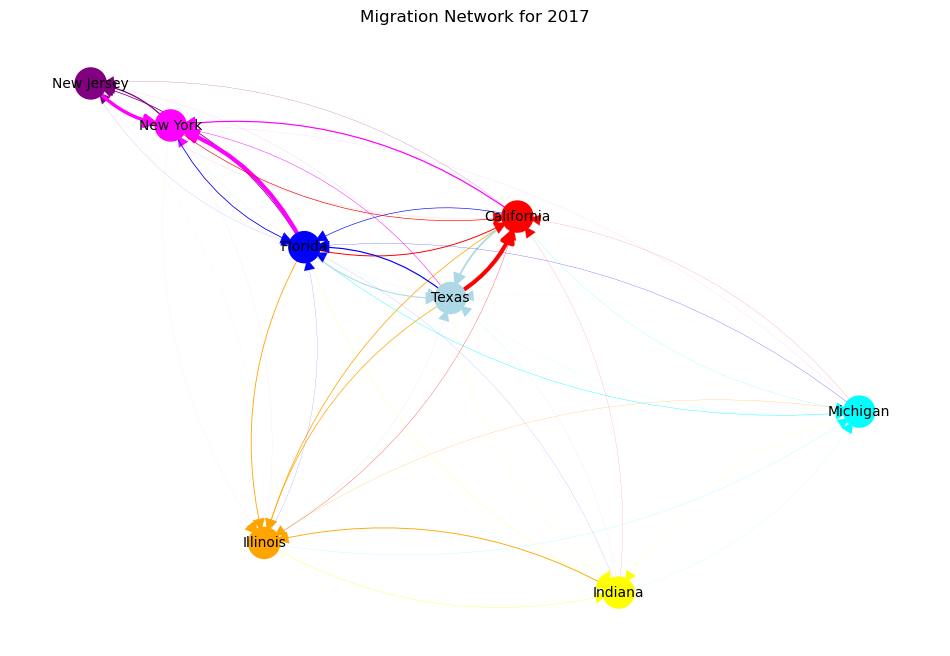

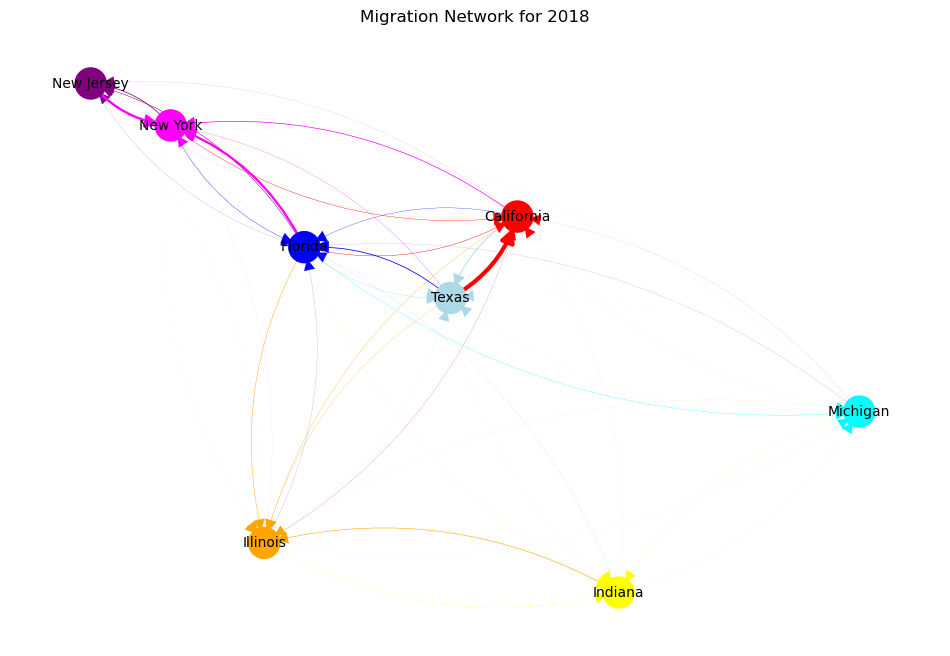

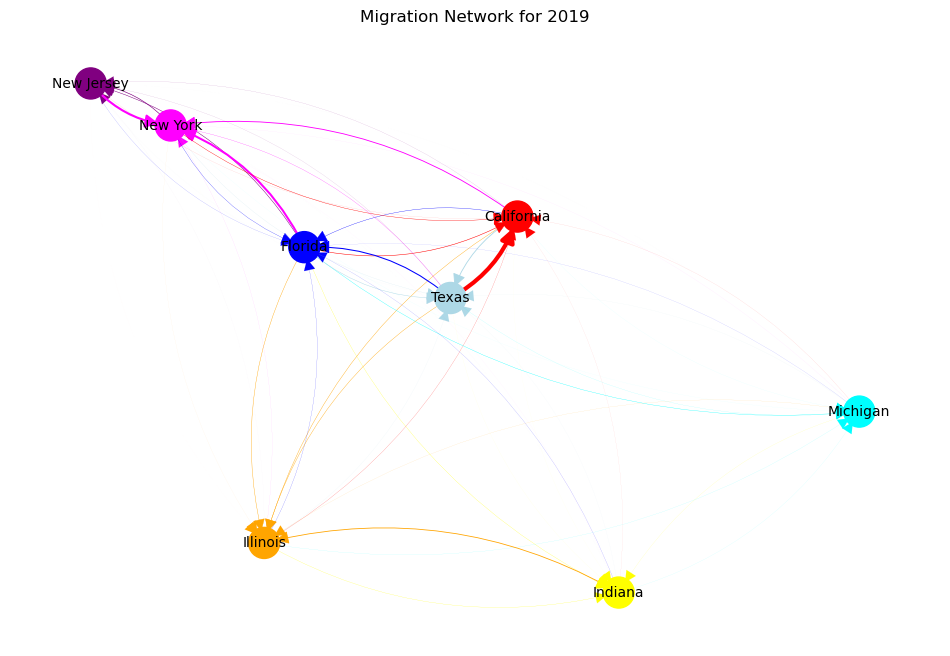

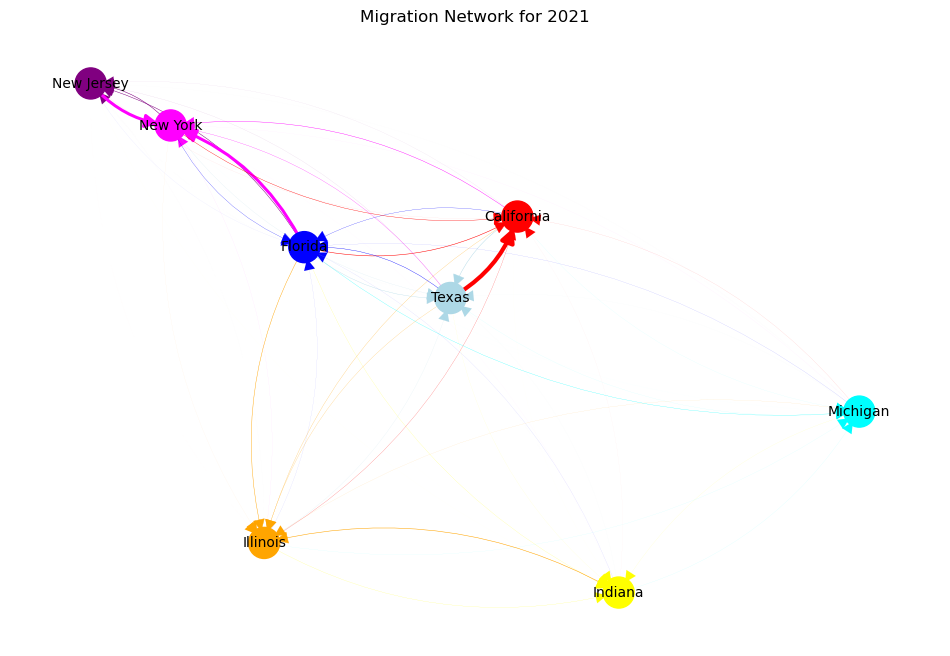

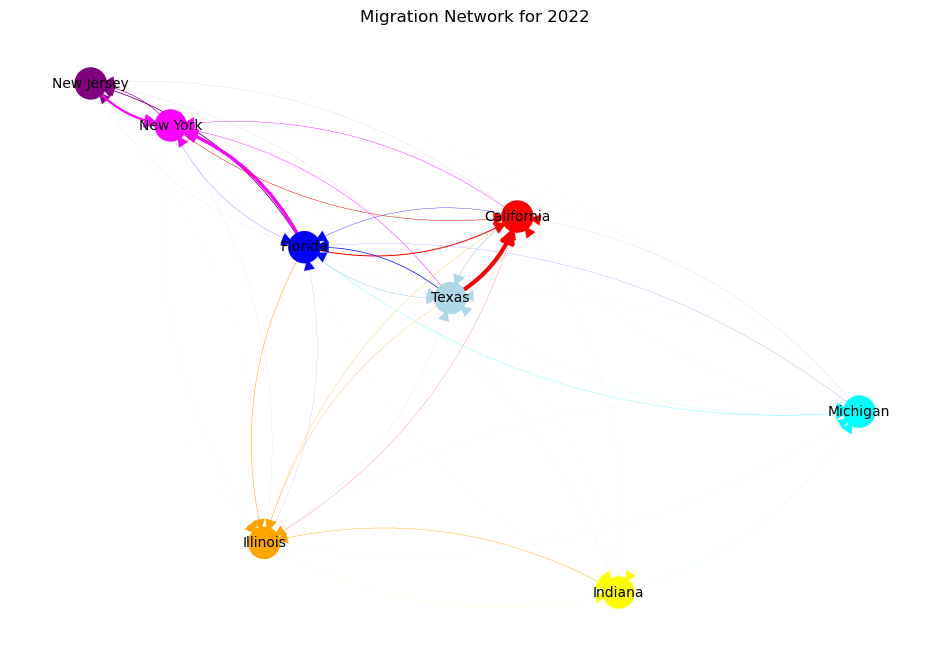

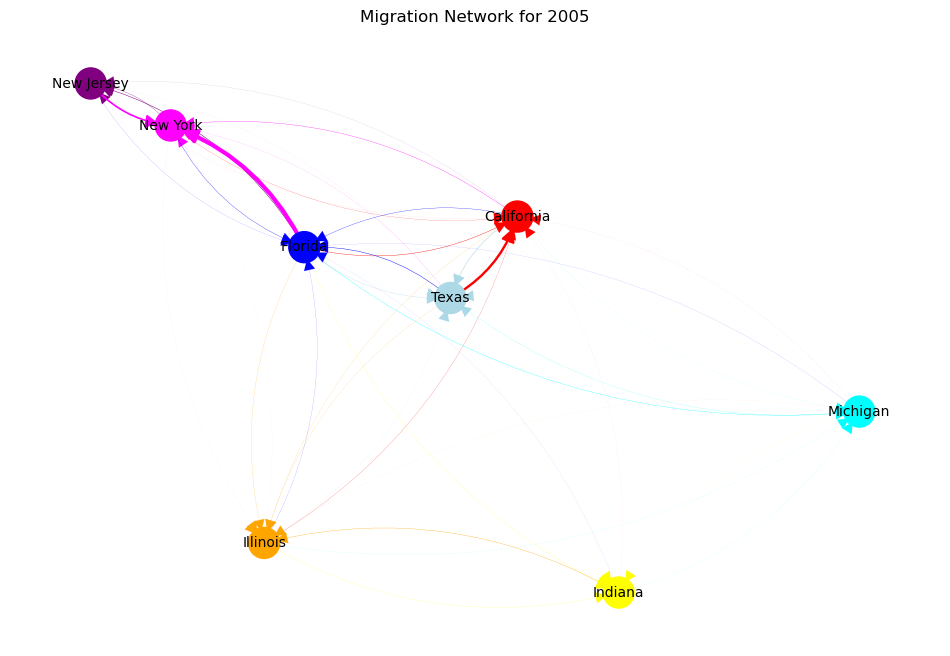

In [8]:
# Compute a consistent layout for nodes based on the 2005 network
consistent_pos = nx.spring_layout(networks['2005'], seed=42)

def visualize_network_fixed_pos(year, graph):
    plt.figure(figsize=(12, 8))
    
    node_colors = {
        'California': 'red',
        'Florida': 'blue',
        'Georgia': 'green',
        'Illinois': 'orange',
        'Indiana': 'yellow',
        'Michigan': 'cyan',
        'New Jersey': 'purple',
        'New York': 'magenta',
        'Texas': 'lightblue'
    }
    
    # Create a dictionary to map nodes to colors
    node_color_dict = {node: node_colors[node] for node in graph.nodes()}
    
    # Draw nodes with different colors
    node_color_list = [node_color_dict[node] for node in graph.nodes()]
    nx.draw_networkx_nodes(graph, consistent_pos, node_color=node_color_list, node_size=500)
    
    # Apply a power transformation to edge weights for enhanced differences
    power = 2
    edge_weights = [graph[u][v]['weight']**power for u, v in graph.edges()]
    
    # Normalize edge weights for visualization
    max_weight = max(edge_weights)
    normalized_weights = [weight / max_weight for weight in edge_weights]
    
    # Draw edges as lines with arrows at the end, and adjust thickness based on the transformed weights
    for (u, v), weight in zip(graph.edges(), normalized_weights):
        edge_color = node_color_dict[v]
        nx.draw_networkx_edges(graph, consistent_pos, edgelist=[(u, v)], width=weight * 3, edge_color=edge_color, connectionstyle="arc3,rad=0.2", arrowsize=20)
    
    # Draw node labels
    nx.draw_networkx_labels(graph, consistent_pos, font_size=10)
    
    plt.title(f"Migration Network for {year}")
    plt.axis("off")
    plt.show()

# Visualize networks for the sample years using the fixed position function
for year in migration_matrices:
    visualize_network_fixed_pos(year, networks[year])


In [9]:
import pandas as pd

# Load all sheets from the Excel file
all_sheets_new = pd.read_excel("Mappe5.2.xlsx", sheet_name=None)

# List to store all DataFrames
dfs = []

# Construct migration matrices for each year
for year, data in all_sheets_new.items():
    if year not in ['Sheet1']:
        migration_matrix = data.set_index("Unnamed: 0").loc[states, states]
        migration_matrix = migration_matrix.fillna(0)
        
        # Add 'year' as an additional level of index
        migration_matrix = migration_matrix.set_index([pd.Series([year] * len(migration_matrix), name='Year'), migration_matrix.index])
        
        dfs.append(migration_matrix)

# Concatenate all the matrices into a single DataFrame with a multi-level index
combined_matrix = pd.concat(dfs)

combined_matrix
combined_matrix.to_csv('combined matrix.csv', index = False)

In [12]:
nodes_data = {
    'ID': [1, 2, 3, 4, 5, 6, 7, 8],
    'Label': ['California', 'Florida', 'Illinois', 'Indiana', 'Michigan', 'New Jersey', 'New York', 'Texas']
}

nodes_df = pd.DataFrame(nodes_data)


In [13]:
edges_list = []

for (year, source), row_data in combined_matrix.iterrows():
    source_id = nodes_df[nodes_df['Label'] == source]['ID'].iloc[0]
    for target, value in row_data.iteritems():
        if value != 0:  # There's a non-zero migration
            target_id = nodes_df[nodes_df['Label'] == target]['ID'].iloc[0]
            edges_list.append([source_id, target_id, year, value])

edges_df = pd.DataFrame(edges_list, columns=['Source', 'Target', 'Year', 'Weight'])

edges_df.to_csv('edges_df.csv', index = False)

print(edges_df)

/var/folders/5m/n7bh0y3n41b6k1g2czh732v00000gn/T/ipykernel_97361/2228370782.py:5: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for target, value in row_data.iteritems():


     Source  Target  Year   Weight
0         1       1  2005  4904586
1         1       2  2005    25252
2         1       3  2005    15848
3         1       4  2005     5611
4         1       5  2005    10073
..      ...     ...   ...      ...
987       8       3  2022    25272
988       8       4  2022    10167
989       8       5  2022    13692
990       8       6  2022    12949
991       8       7  2022    30890

[992 rows x 4 columns]


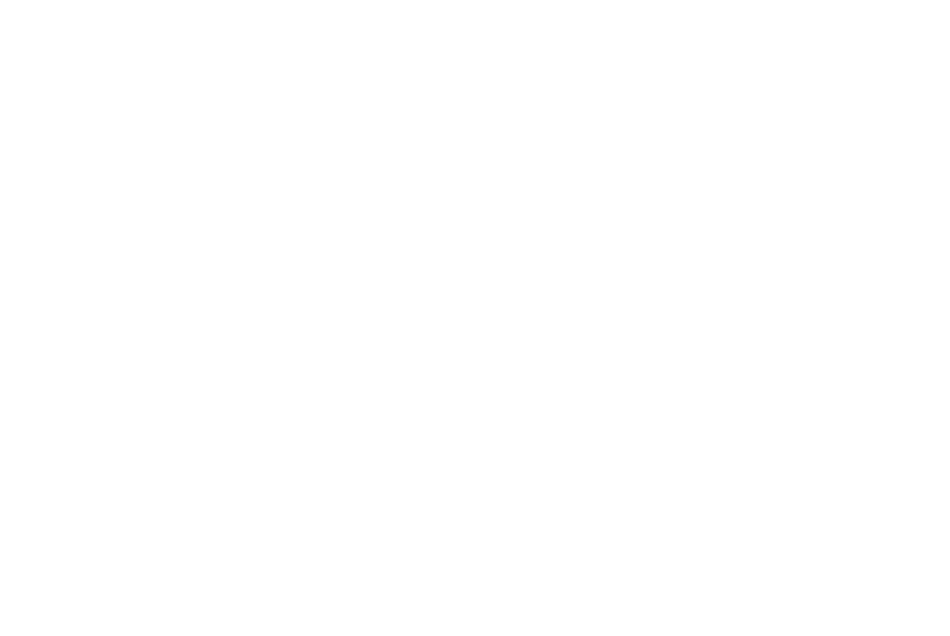

In [14]:
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib.animation import FuncAnimation

# Assuming `networks` and `migration_matrices` are already defined

# Setup figure and axes for the animation
fig, ax = plt.subplots(figsize=(12, 8))
plt.axis('off')

# This will be the function called at each frame of the animation.
def update(year):
    ax.clear()  # Clear current frame/plot
    plt.axis('off')
    visualize_network_fixed_pos(year, networks[year])

# Create animation
ani = FuncAnimation(fig, update, frames=migration_matrices.keys(), repeat=False, interval=1000)

# To view the animation in Jupyter Notebook (optional)
# from IPython.display import HTML
# HTML(ani.to_jshtml())

# To save the animation to a file (optional)
# ani.save('migration_network_animation.mp4', writer='ffmpeg', fps=1)

plt.show()
